In [9]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math
from axes import axes

# retina distplay
%matplotlib inline
# hidpi display
plt.rcParams['figure.dpi'] = 300
# turn on grid by default
plt.rcParams['axes.grid'] = True


In [10]:

def wavefun(x: np.ndarray,t: float, k: float, omega: float, phi: float) -> np.ndarray:
    return np.cos(k*x - omega*t + phi)

def reflected(x: np.ndarray, t: float, k: float, omega: float, phi: float, r: float) -> np.ndarray:
    return r*np.cos(k*x + omega*t + phi)
def transmitted(x: np.ndarray, t: float, k: float, omega: float, phi: float, tt: float) -> np.ndarray:
    return tt*np.cos(k*x - omega*t + phi)

def plot_wavefun(x: np.ndarray, t: float, k: float, omega: float, phi: float, z1: float, z2: float) -> None:
    r = (z1-z2)/(z1+z2)
    tt = (2*z1)/(z1+z2)
    k1 = k
    k2 = k*z1/z2
    y = wavefun(x[x<0],t,k1,omega,phi)
    yref = reflected(x[x<0],t,k1,omega,phi,r)
    ytrans = transmitted(x[x>0],t,k2,omega,phi,tt)
    y_tot = np.concatenate((yref+y,ytrans))
    plt.plot(x,y_tot, label="wave")
    plt.plot(x[x<0],y_tot, label="incident")
    plt.plot(x[x<0],yref, label="reflected")
    plt.plot(x[x>0],ytrans, label="transmitted")
    plt.legend()
    plt.show()

#plot_wavefun(np.linspace(-10,10,100), 0, 1, 1, 0, 0.5, 0.5)

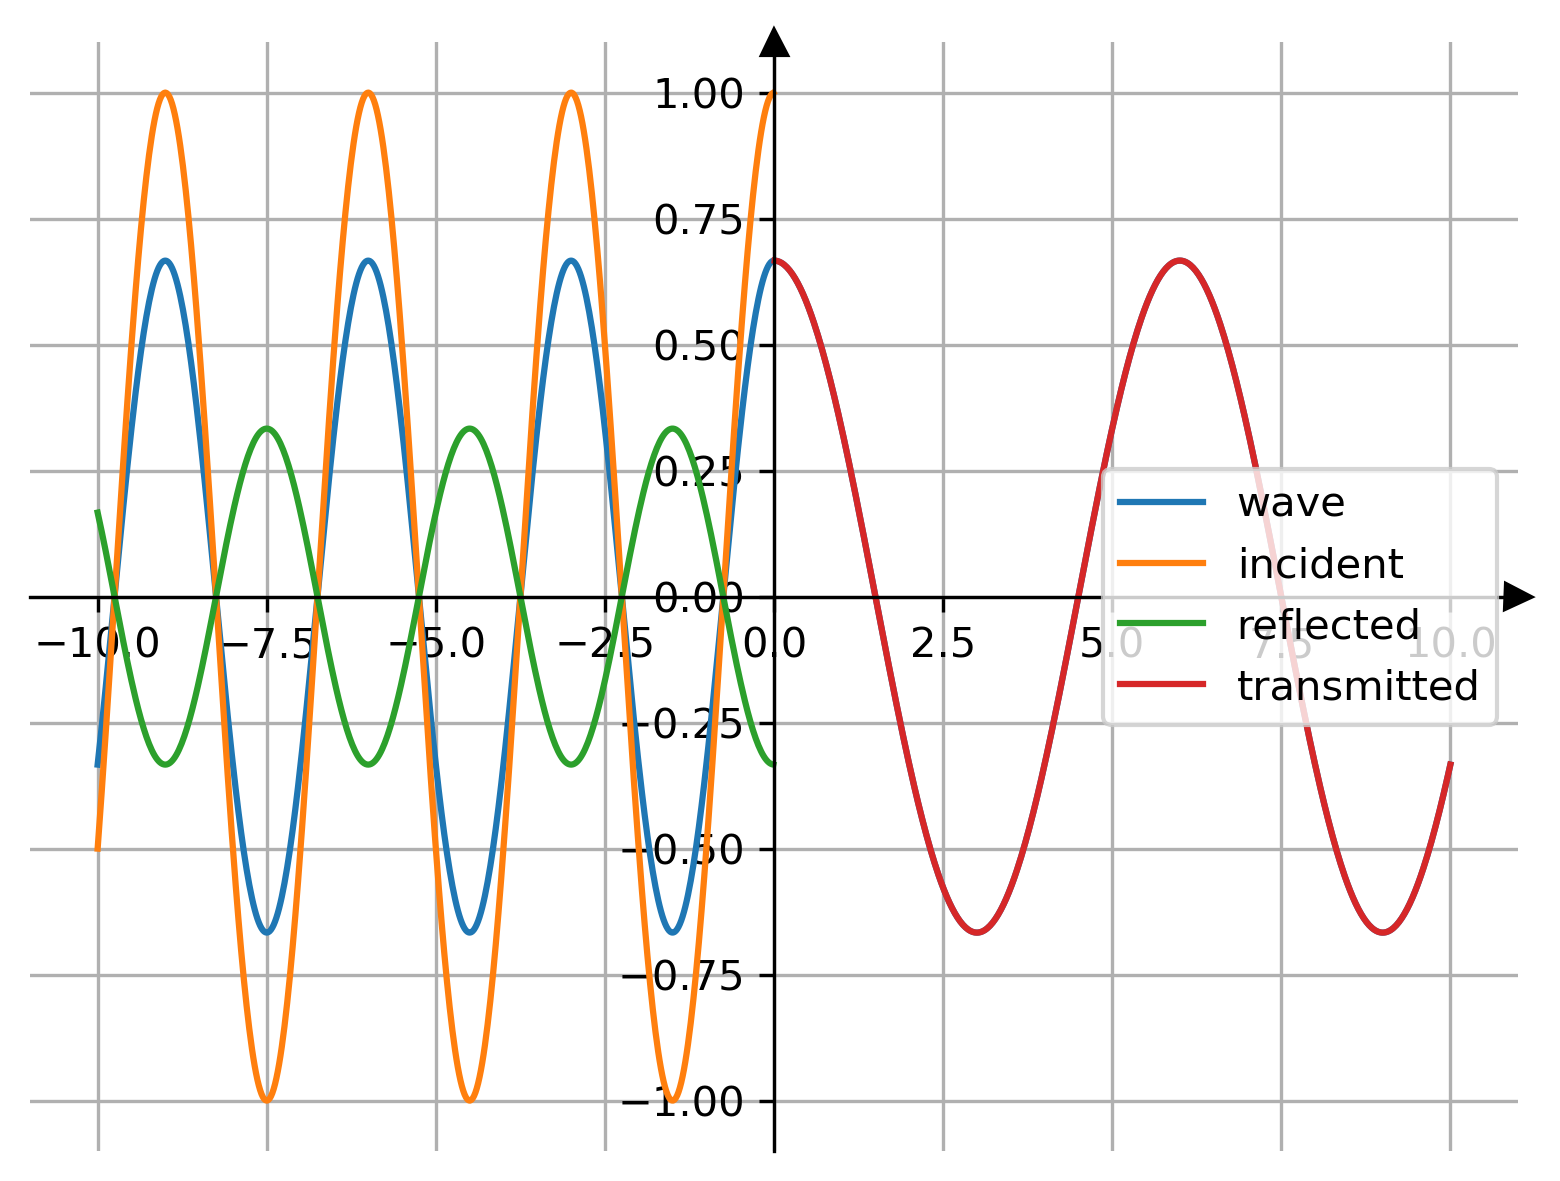

In [11]:
# regular case: z2=2, fixed end: z2=99999, fre end: z2 = 1e-9 (0 is numerically unstable the way
# I have coded it -- even 1e-9 doesn't quite do the right thing for x>0)
t=0
z1 = 1
z2 = 2
k = 2*np.pi/3. 
omega = 2*np.pi/5. 
phi = 0
r = (z1-z2)/(z1+z2)
tt = (2*z1)/(z1+z2)
k1 = k
k2 = k*z1/z2
x = np.linspace(-10,10,1000)
y = wavefun(x[x<0],t,k1,omega,phi)
yref = reflected(x[x<0],t,k1,omega,phi,r)
ytrans = transmitted(x[x>0],t,k2,omega,phi,tt)
y_tot = np.concatenate((yref+y,ytrans))
plt.plot(x,y_tot, label="wave")
plt.plot(x[x<0],y, label="incident")
plt.plot(x[x<0],yref, label="reflected")
plt.plot(x[x>0],ytrans, label="transmitted")
plt.legend()
axes()


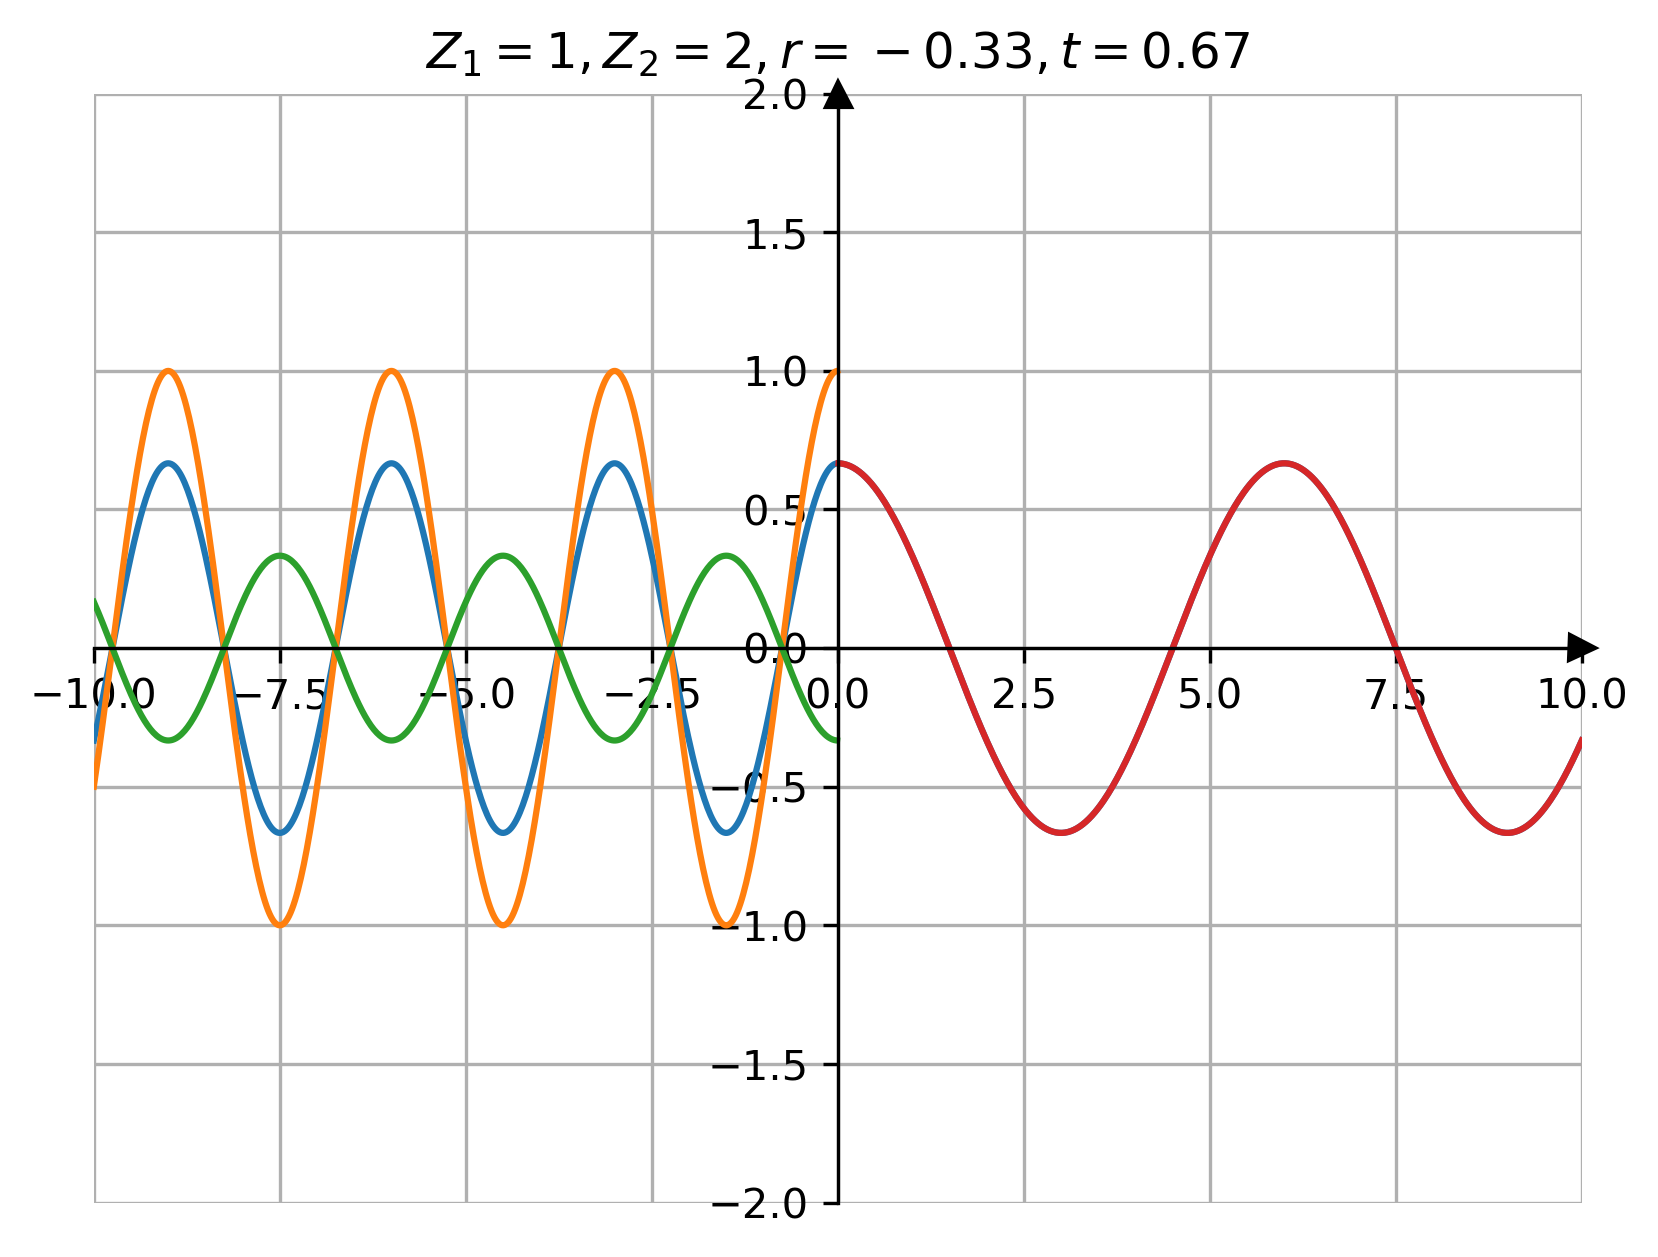

In [13]:
def animate(t:float):
    plt.cla()
    y = wavefun(x[x<0],t,k1,omega,phi)
    yref = reflected(x[x<0],t,k1,omega,phi,r)
    ytrans = transmitted(x[x>0],t,k2,omega,phi,tt)
    y_tot = np.concatenate((yref+y,ytrans))
    plt.plot(x,y_tot, label="wave")
    plt.title(f"$Z_1={z1}, Z_2={z2}, r={r:0.2f}, t={tt:0.2f}$")
    plt.plot(x[x<0],y, label="incident")
    plt.plot(x[x<0],yref, label="reflected")
    plt.plot(x[x>0],ytrans, label="transmitted")
    axes()
    plt.ylim(-2,2)
    plt.xlim(-10,10)

ani = FuncAnimation(plt.gcf(), animate, frames=np.linspace(0,10,200), interval=100)
ani.save('string_refl.mp4',
          writer='ffmpeg', fps=24, dpi=100)


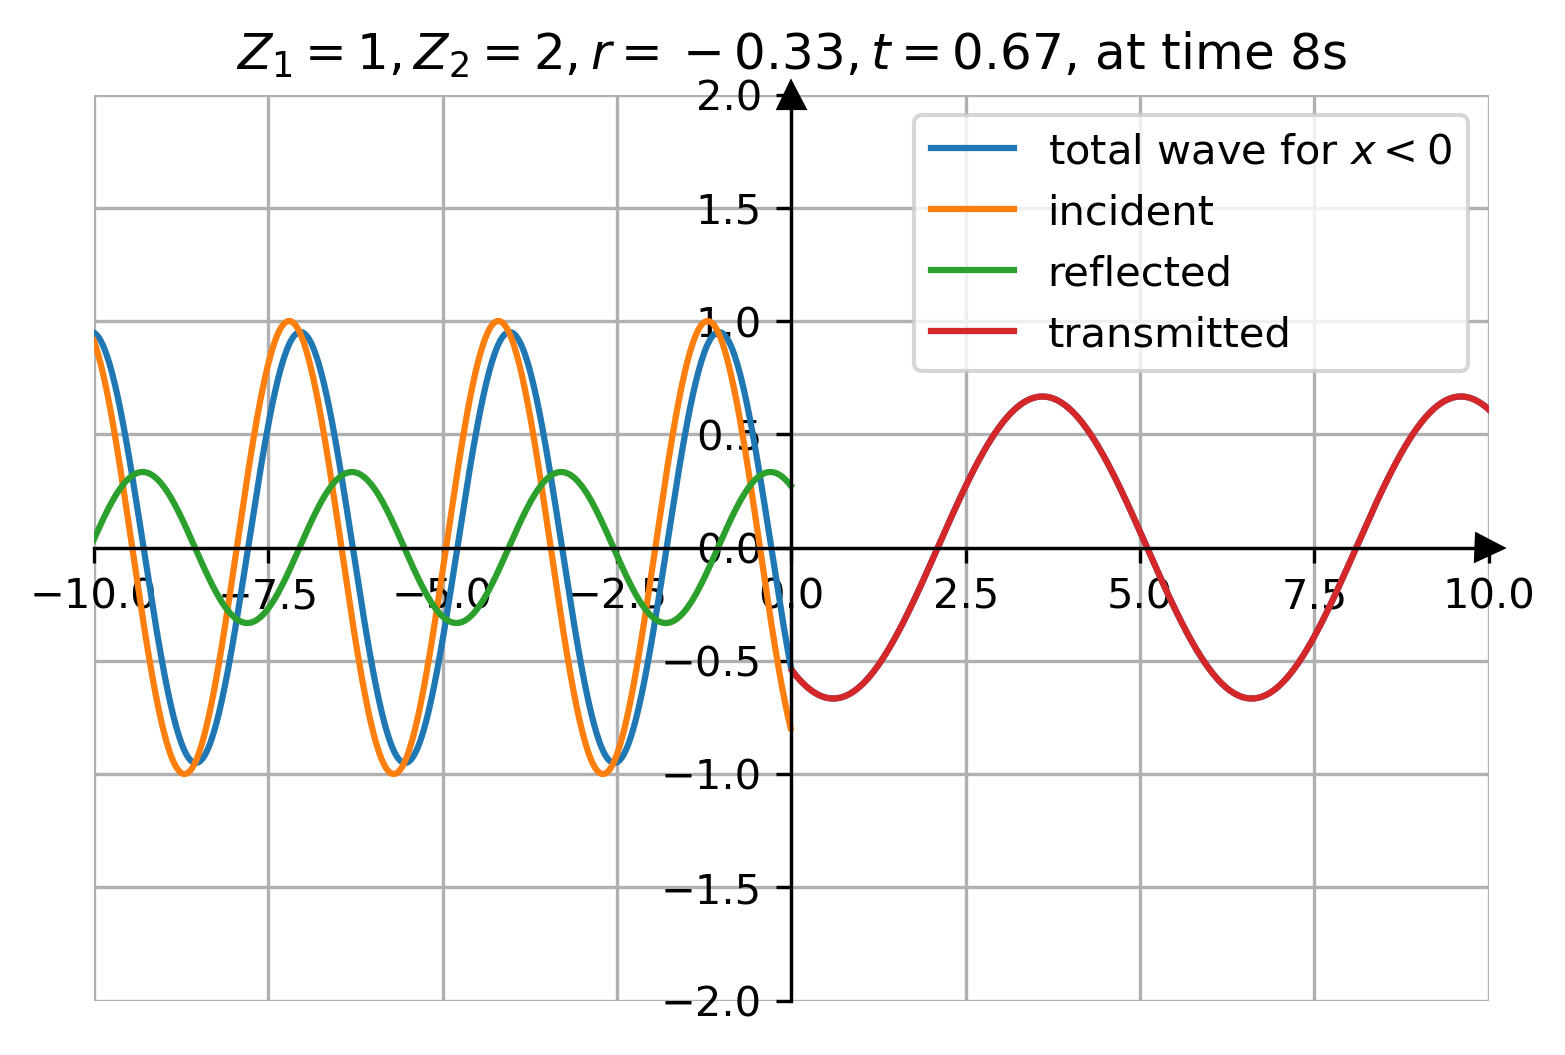

In [ ]:
# make a picture of a single frame for easier inspection
plt.ylim(-2,2)
plt.xlim(-10,10)
t=8
y = wavefun(x[x<0],t,k1,omega,phi)
yref = reflected(x[x<0],t,k1,omega,phi,r)
ytrans = transmitted(x[x>0],t,k2,omega,phi,tt)
y_tot = np.concatenate((yref+y,ytrans))
plt.plot(x,y_tot, label=f"total wave for $x<0$")
plt.title(f"$Z_1={z1}, Z_2={z2}, r={r:0.2f}, t={tt:0.2f}$, at time ${t}$s")
plt.plot(x[x<0],y, label="incident")
plt.plot(x[x<0],yref, label="reflected")
plt.plot(x[x>0],ytrans, label="transmitted")
axes()
plt.legend()
plt.savefig("string_refl.png")